In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedDict
from typing import Optional, Dict, List, Iterable, Union
from numbers import Number

# `Order` class

In [1]:
pwd

'/Users/jeepee/Documents/coding/python/20191116-matching_engine'

In [3]:
class Order(object):
    __slots__ = ['_info']
    
    def __init__(self, order_id : Optional[int] = None, qty : Optional[int] = None):
        self._info = {
            'order_id': order_id or np.random.randint(np.iinfo(np.int64).max),
            'qty': qty or np.random.binomial(50, .5),
        }
        
    @classmethod
    def random_init(cls, order_id : Optional[int] = None, qty : Optional[int] = None):
        order_id = order_id or np.random.randint(np.iinfo(np.int64).max)
        qty = qty or np.random.binomial(50, .5)
        return cls(order_id=order_id, qty=qty)
    
    @property
    def order_id(self):
        return self._info['order_id']
    
    @order_id.setter
    def order_id(self, order_id):
        assert isinstance(order_id, int)
        self._info['order_id'] = order_id
    
    id = order_id
    
    @property
    def qty(self):
        return self._info['qty']
    
    @qty.setter
    def qty(self, qty): 
        assert isinstance(qty, int) and qty > 0
        self._info['qty'] = qty
        
    def __repr__(self):
        return f"[Order {self.order_id:019d}]: {self.qty}"

In [84]:
orders = [Order.random_init() for _ in range(10)]
orders

[[Order 0139441004816365063]: 27,
 [Order 7337992240750462657]: 33,
 [Order 4175219887834108076]: 19,
 [Order 7767930926837932065]: 23,
 [Order 0144378561449330759]: 20,
 [Order 5950026707431916060]: 23,
 [Order 7251906576287496400]: 25,
 [Order 1949896409957108417]: 26,
 [Order 5396319815134860063]: 27,
 [Order 3699555609910207754]: 21]

# `Side` class

In [4]:
from enum import Enum

class SideEnum(Enum):
    ASK = A = BUY = 1
    BID = B = SELL = -1
    
#     def __init__(self, side: int):
#         self._side = side
#     def repr(self):
        
    
    @staticmethod
    def parse(raw_side: Union[int, str]):
        if isinstance(raw_side, int) and raw_side in {-1, 1}:
            return SideEnum(raw_side)
        elif isinstance(raw_side, str):
            if raw_side.upper() in {'A', 'ASK', 'BUY',}:
                return SideEnum.ASK
            elif raw_side.upper() in {'B', 'BID', 'SELL'}:
                return SideEnum.BID
            else:
                raise ValueError(f'Unrecognized side string: {raw_side}')
        else:
            raise ValueError(f'Unknown input for side: {raw_side}')

# `Level` class

In [5]:
class Level(object):
    __slots__ = ['_info', '_orders', ]
    
    def __init__(self, side:str, px:Number, orders:Iterable[Order]):
        self._orders: SortedDict = SortedDict((order.id, order) for order in orders)
        self._info: Dict = {
            'side': SideEnum.parse(side),
            'px': px,
            'n': len(orders),
            'qty': sum(order.qty for order in orders),
        }
            
    @property
    def side(self):
        return self._info['side']
    
    @side.setter
    def n(self, _side: str):
        self._info['side'] = SideEnum.parse(_side)
    
    @property
    def n(self):
        return self._info['n']
    
    @property
    def qty(self):
        return self._info['qty']
    
    @property
    def px(self):
        return self._info['px']
    
    def __repr__(self):
        orders_str = '\n'.join(f'\t{order}' for order in self._orders.values())
        return f'Level {self._info}' + ' {\n' + orders_str + '\n}'

In [10]:
orders = [Order.random_init() for _ in range(10)]
level = Level('ASK', 1, orders)
print(level)

Level {'side': <SideEnum.ASK: 1>, 'px': 1, 'n': 10, 'qty': 238} {
	[Order 4246909851785831331]: 20
	[Order 4356558097802676014]: 27
	[Order 4540429275259533856]: 23
	[Order 5489272536189099981]: 27
	[Order 5777021801465613654]: 20
	[Order 6542529599735315575]: 25
	[Order 6764380256726452445]: 26
	[Order 7731886554559070654]: 23
	[Order 8406606129049387391]: 28
	[Order 8560084040326508435]: 19
}


# `Side` class

In [ ]:
class Side(object):
    def __init__(self, )

# `Book` class

In [7]:
class Book(object):
    def __init__(self):
        self._bid = SortedDict()
        self._ask = SortedDict()
        self._info = {}
    
    def random_init(self):
        for px, count in zip(np.arange(1, 11), np.histogram(np.clip(np.random.poisson(4,1000), 1, 10,), bins=10)[0]):
            self._ask[px] = Level("ASK", px, [Order() for _ in range(count)])
        for px, count in zip(np.arange(0, -10, -1), np.histogram(np.clip(np.random.poisson(4,1000), 1, 10,), bins=10)[0]):
            self._bid[px] = Level("BID", px, [Order() for _ in range(count)])
        return self
       
#     def is_crossed(self) -> bool:
#         if 
    
    def imshow(self):
        fig, ax = plt.subplots(figsize=(16,10))
        ax.barh(self._ask.keys(), [level.qty for level in self._ask.values()], color='red')
        ax.barh(self._bid.keys(), [-level.qty for level in self._bid.values()], color='blue')
        ax.grid()
        ax.set_yticks(range(self._bid.peekitem(0)[0], self._ask.peekitem(-1)[0]+1))
        plt.show()
        
    def __repr__(self):
        ask_str = '\n'.join(f'\t{level}' for level in self._ask.values())
        bid_str = '\n'.join(f'\t{level}' for level in self._bid.values())
        return f'Book {self._info}' + ' {\n' + (ask_str + bid_str).replace('\n', '\n\t') + '\n}'

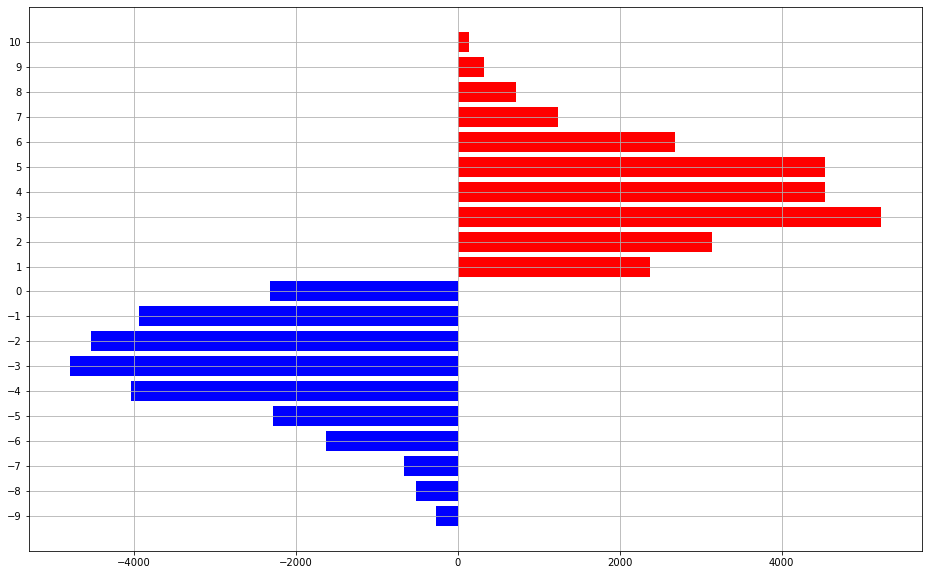

In [8]:
book = Book().random_init()
book.imshow()

In [170]:
book._ask.peekitem(-1)

(10, Level{'side': <Side.ASK: 1>, 'px': 10, 'n': 5, 'qty': 128} {
 	[Order 2226643408282741834]: 24
 	[Order 2418386383135485972]: 28
 	[Order 3049932791580216144]: 26
 	[Order 3744000043744840961]: 32
 	[Order 6710011564668667789]: 18
 })

## Order agent dynamics (discrete time model)

Time is preceding frame-by-frame for each timestep. In each step, order agent is 

### Global state variables

Some global state variables visible to all order agents:
- `bid_qty0`, `bid_qty1`...
- `bid_px0`, `bid_px1`...
- `ask_qty0`, `ask_qty1`...
- `ask_px0`, `ask_px1`...
- `wmid`: can be derived from previous variables
- `bid_trade_qty_5s`, `ask_trade_qty_5s`: total trade qty in last 5s on bid/ask

- ... **To be completed**

### Order state variables
#### Explicit state variables
Each order is a state machine with following explicit state variables:
- `is_existing`: whether the order is in the book.
- `px`
- `level`
- `qty`
- `side`
- `qty_priority`: the qty before this order
- `order_priority`: the number of order before this order


#### Implicit state variables
Also, each order has some implicit (hidden) state:
- `aggressive_willingness`
- `remove_willingness`
- `retreat_willingness`
- `qty_willingness`


### Actions allowed for non-existing orders:
- `pass()`
- `add(px, qty, side)`


### Actions allowed for existing orders:

- `pass()`
- `remove()`
- `update_px(px)`
- `update_qty(qty)`

In [ ]:
class OrderAgent(object):
    def __init__(self):
        pass
    
    @property
    def aggressive_willingness(self):
        """(double) 0.0 - 1.0"""
        return -1.0 # TODO: finish this part